In [38]:
#pip install pytrends

In [39]:
# Importing libraries 
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns

# Import statsmodels API for time series decomposition
import statsmodels.api as sm

# Importing pytrends Package 
from pytrends.request import TrendReq

# Setting up the pyrends object with a proxy
pytrends = TrendReq(hl='de-DE', tz=60)

In [40]:
# Creating a list of keywords to search 
kw_list = ['chatgpt','ai','deepseek']

In [41]:
pytrends.build_payload(kw_list, 
                       cat=0, 
                       timeframe='today 5-y',
                       geo='DE',
                       gprop='')

In [42]:
df_trend = pytrends.interest_over_time()
df_trend.head()

/opt/anaconda3/lib/python3.12/site-packages/pytrends/request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


,chatgpt,ai,deepseek,isPartial
date,,,,
2020-05-17,0,3,0,False
2020-05-24,0,3,0,False
2020-05-31,0,3,0,False
2020-06-07,0,3,0,False
2020-06-14,0,3,0,False


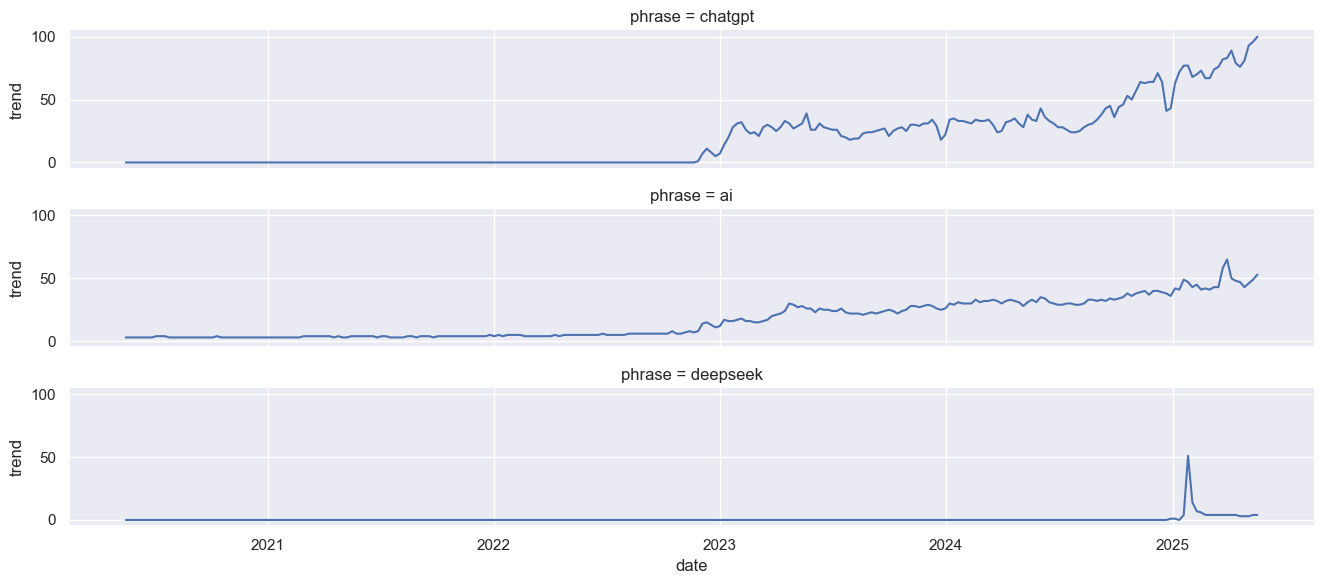

In [43]:
# Plotsize for the graphs 
sns.set(rc={'figure.figsize':(10,5)})

plot_data = df_trend.iloc[:, 0:len(df_trend.columns)-1]
plot_data = plot_data.reset_index() \
    .melt(id_vars='date', 
          var_name='phrase', 
          value_name='trend')

# Plot 
g = sns.relplot(data=plot_data, 
                x='date', 
                y='trend', 
                kind='line', 
                row='phrase', 
                height=2.0, 
                aspect=6.7)

/opt/anaconda3/lib/python3.12/site-packages/pytrends/request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


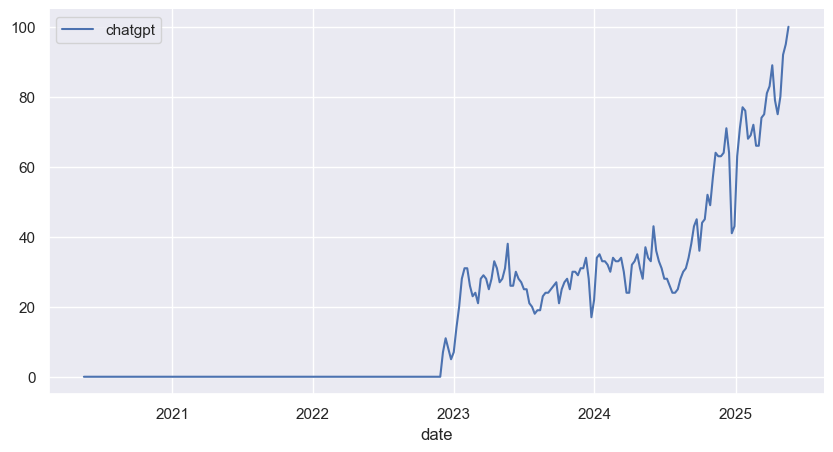

In [44]:
# Note: returns different values when the phrase is queried on its own.
kw_list = ['chatgpt']
pytrends.build_payload(kw_list,
                       cat=0,
                       timeframe='today 5-y',
                       geo='DE',
                       gprop='')
df_trend_single = pytrends.interest_over_time()
sns.lineplot(data=df_trend_single.iloc[:,0:1])
sns.despine()


## Timeseries Decomposition
The statsmodels package offers one of the ways to decompose time series into their components. This approach is used, for example, in forecasting. The time series is broken down into its individual components, which are then available separately and can also be plotted together using a helper function

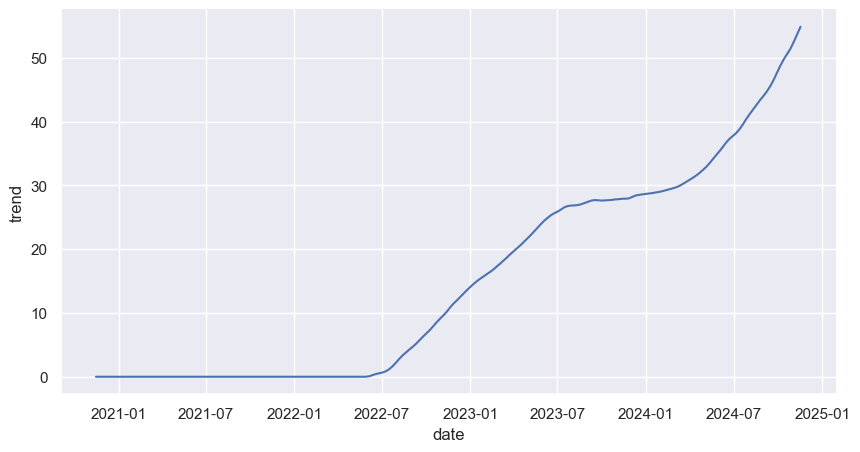

In [45]:
# Execute decompose for a time series
df = df_trend_single.iloc[:,0:1]
decompose = sm.tsa.seasonal_decompose(df,
                                      model='additive')

# Plotting the Trends 
sns.lineplot(data=decompose.trend)
sns.despine()

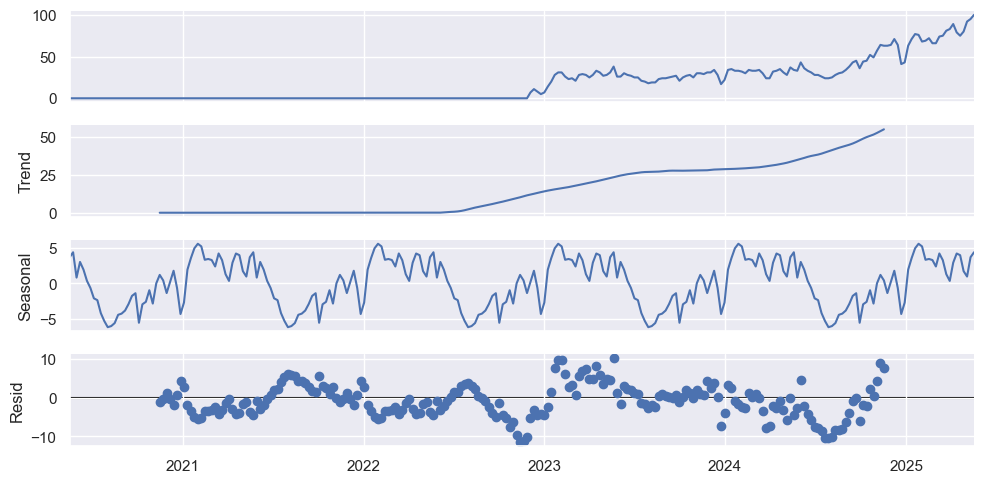

In [46]:
# Object contains different parts of the time series
# decompose.observed
# decompose.trend
# decompose.seasonal
# decompose.resid
# Über .plot() kann ein Facetgrid geplottet werden
decompose.plot()
sns.despine()